# Primera entrega ML

### Precio de la venta de vivienda en Barcelona

### Tema

El objetivo de este proyecto es predecir mediante el uso de diferentes parametros el precio de la vivienda en Barcelona.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder


# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Estandarizacion 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelos Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import utils.funciones as func
import train

In [2]:
import pandas as pd
# load dataset
datos = pd.read_csv('data/raw/Barcelona_Idealista.csv')
df = datos.copy()

In [3]:
df

Unnamed: 0       city             district  \
0              0  Barcelona             Eixample   
1              1  Barcelona  Sarrià-Sant Gervasi   
2              2  Barcelona             Eixample   
3              3  Barcelona             Eixample   
4              4  Barcelona       Horta-Guinardó   
...          ...        ...                  ...   
3260        3260  Barcelona               Gràcia   
3261        3261  Barcelona         Ciutat Vella   
3262        3262  Barcelona            Les Corts   
3263        3263  Barcelona           Sant Martí   
3264        3264  Barcelona         Ciutat Vella   

                                neighborhood       condition       type  \
0                     la Dreta de l'Eixample  good condition       Flat   
1                     Sant Gervasi - Galvany  good condition       Flat   
2                                Sant Antoni  good condition  Penthouse   
3                     la Dreta de l'Eixample  good condition       Flat   
4                                   Can Baró  good condition   Terraced   
...                                      ...             ...        ...   
3260                       la Vila de Gràcia    needs refurb       Flat   
3261  Sant Pere - Santa Caterina i la Ribera    needs refurb       Flat   
3262              la Maternitat i Sant Ramon    needs refurb       Flat   
3263       el Parc i la Llacuna del Poblenou    needs refurb       Flat   
3264                                el Raval    needs refurb       Flat   

      rooms  area_m2 lift     views         floor   prices  
0         3      351  Yes  exterior       floor 1  2300000  
1         5      298  Yes  exterior       floor 3  1750000  
2         2       90  Yes  exterior       floor 7   590000  
3         2      130  Yes  exterior       floor 1   450000  
4         3      110   No  exterior      Multiple   430000  
...     ...      ...  ...       ...           ...      ...  
3260      1       64  Yes  exterior       floor 1   295000  
3261      3       99   No  exterior       floor 2   420000  
3262      4      127  Yes  exterior       floor 4   545000  
3263      3       64   No  exterior  ground floor   170000  
3264      4       70   No  exterior       floor 1   178800  

[3265 rows x 12 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'city', 'district', 'neighborhood', 'condition', 'type',
       'rooms', 'area_m2', 'lift', 'views', 'floor', 'prices'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3265 non-null   int64 
 1   city          3265 non-null   object
 2   district      3265 non-null   object
 3   neighborhood  3265 non-null   object
 4   condition     3265 non-null   object
 5   type          3265 non-null   object
 6   rooms         3265 non-null   int64 
 7   area_m2       3265 non-null   int64 
 8   lift          3265 non-null   object
 9   views         3265 non-null   object
 10  floor         3265 non-null   object
 11  prices        3265 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 306.2+ KB


### Se cuentan 8 variables categoricas y 4 variables enteras. Se observa como no hay ningun valor nulo.

In [6]:
# Se eliminan las variables Unnamed: 0 y city ya que no aportan información relevante
df = df.drop(["Unnamed: 0", "city"], axis=1)
df

district                            neighborhood  \
0                Eixample                  la Dreta de l'Eixample   
1     Sarrià-Sant Gervasi                  Sant Gervasi - Galvany   
2                Eixample                             Sant Antoni   
3                Eixample                  la Dreta de l'Eixample   
4          Horta-Guinardó                                Can Baró   
...                   ...                                     ...   
3260               Gràcia                       la Vila de Gràcia   
3261         Ciutat Vella  Sant Pere - Santa Caterina i la Ribera   
3262            Les Corts              la Maternitat i Sant Ramon   
3263           Sant Martí       el Parc i la Llacuna del Poblenou   
3264         Ciutat Vella                                el Raval   

           condition       type  rooms  area_m2 lift     views         floor  \
0     good condition       Flat      3      351  Yes  exterior       floor 1   
1     good condition       Flat      5      298  Yes  exterior       floor 3   
2     good condition  Penthouse      2       90  Yes  exterior       floor 7   
3     good condition       Flat      2      130  Yes  exterior       floor 1   
4     good condition   Terraced      3      110   No  exterior      Multiple   
...              ...        ...    ...      ...  ...       ...           ...   
3260    needs refurb       Flat      1       64  Yes  exterior       floor 1   
3261    needs refurb       Flat      3       99   No  exterior       floor 2   
3262    needs refurb       Flat      4      127  Yes  exterior       floor 4   
3263    needs refurb       Flat      3       64   No  exterior  ground floor   
3264    needs refurb       Flat      4       70   No  exterior       floor 1   

       prices  
0     2300000  
1     1750000  
2      590000  
3      450000  
4      430000  
...       ...  
3260   295000  
3261   420000  
3262   545000  
3263   170000  
3264   178800  

[3265 rows x 10 columns]

In [7]:
df.to_csv('data/processed/df_clean.cvs', index=False)

In [8]:
df.columns

Index(['district', 'neighborhood', 'condition', 'type', 'rooms', 'area_m2',
       'lift', 'views', 'floor', 'prices'],
      dtype='object')

In [9]:
# Se utlizaran las variables siguientes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   condition     3265 non-null   object
 3   type          3265 non-null   object
 4   rooms         3265 non-null   int64 
 5   area_m2       3265 non-null   int64 
 6   lift          3265 non-null   object
 7   views         3265 non-null   object
 8   floor         3265 non-null   object
 9   prices        3265 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 255.2+ KB


In [10]:
df.describe()

rooms      area_m2        prices
count  3265.000000  3265.000000  3.265000e+03
mean      3.160796   121.566616  6.004200e+05
std       1.325257    92.721515  6.522661e+05
min       1.000000    20.000000  4.900000e+04
25%       2.000000    72.000000  2.799000e+05
50%       3.000000    93.000000  4.190000e+05
75%       4.000000   135.000000  6.550000e+05
max      13.000000   900.000000  1.200000e+07

## Se utilizará la variable "prices" como la variable objetivo

In [11]:
# Resumen de estadística descriptiva:
df['prices'].describe()

count    3.265000e+03
mean     6.004200e+05
std      6.522661e+05
min      4.900000e+04
25%      2.799000e+05
50%      4.190000e+05
75%      6.550000e+05
max      1.200000e+07
Name: prices, dtype: float64

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prices', ylabel='Density'>

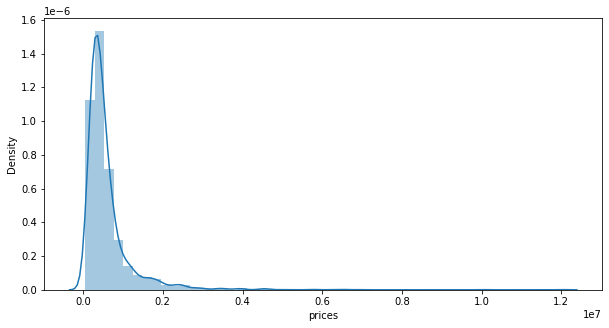

In [12]:
# Histograma:

plt.figure(figsize=(10,5),facecolor='w')
sns.distplot(df['prices'])

A simple vista se pueden apreciar:

* Una desviación con respecto a la distribución normal.
* Algunos picos.

Se observa que la gran mayoria de pisos los 50.000 € y los 200.000 €

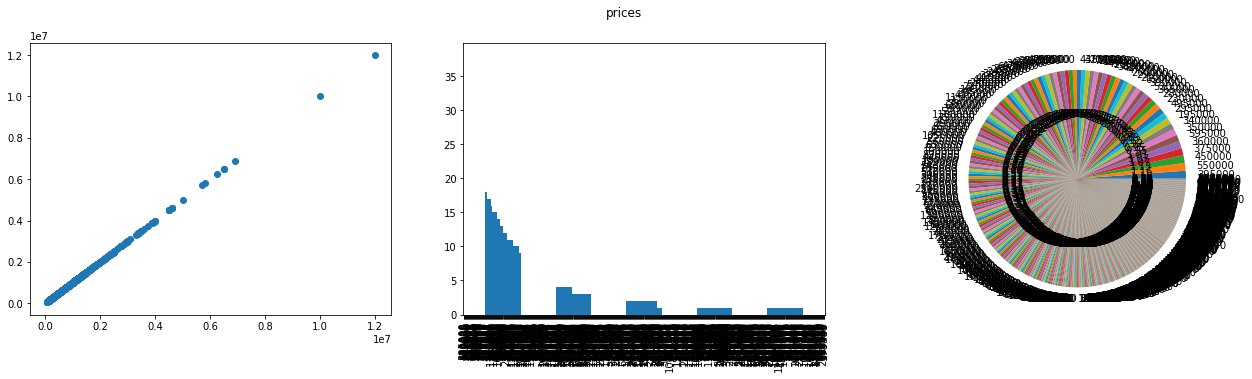

In [13]:
x = 'prices'
func.pintar(df, x)

# A continuacion se analizaran cada una de las variables

In [14]:
df

district                            neighborhood  \
0                Eixample                  la Dreta de l'Eixample   
1     Sarrià-Sant Gervasi                  Sant Gervasi - Galvany   
2                Eixample                             Sant Antoni   
3                Eixample                  la Dreta de l'Eixample   
4          Horta-Guinardó                                Can Baró   
...                   ...                                     ...   
3260               Gràcia                       la Vila de Gràcia   
3261         Ciutat Vella  Sant Pere - Santa Caterina i la Ribera   
3262            Les Corts              la Maternitat i Sant Ramon   
3263           Sant Martí       el Parc i la Llacuna del Poblenou   
3264         Ciutat Vella                                el Raval   

           condition       type  rooms  area_m2 lift     views         floor  \
0     good condition       Flat      3      351  Yes  exterior       floor 1   
1     good condition       Flat      5      298  Yes  exterior       floor 3   
2     good condition  Penthouse      2       90  Yes  exterior       floor 7   
3     good condition       Flat      2      130  Yes  exterior       floor 1   
4     good condition   Terraced      3      110   No  exterior      Multiple   
...              ...        ...    ...      ...  ...       ...           ...   
3260    needs refurb       Flat      1       64  Yes  exterior       floor 1   
3261    needs refurb       Flat      3       99   No  exterior       floor 2   
3262    needs refurb       Flat      4      127  Yes  exterior       floor 4   
3263    needs refurb       Flat      3       64   No  exterior  ground floor   
3264    needs refurb       Flat      4       70   No  exterior       floor 1   

       prices  
0     2300000  
1     1750000  
2      590000  
3      450000  
4      430000  
...       ...  
3260   295000  
3261   420000  
3262   545000  
3263   170000  
3264   178800  

[3265 rows x 10 columns]

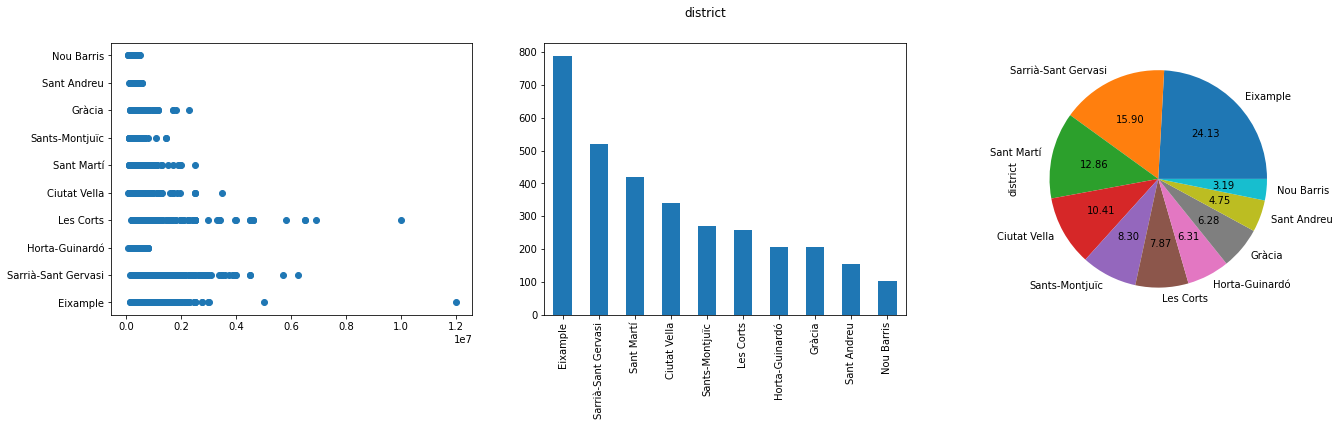

In [15]:
x = 'district'
func.pintar(df, x)

* Los barrios donde más pisos hay son Eixample, Sarrià-Sant Gervasi y Sant Martí
* Los barrios donde más pisos hay son Nou Barris, Sant Andreu, Gràcia

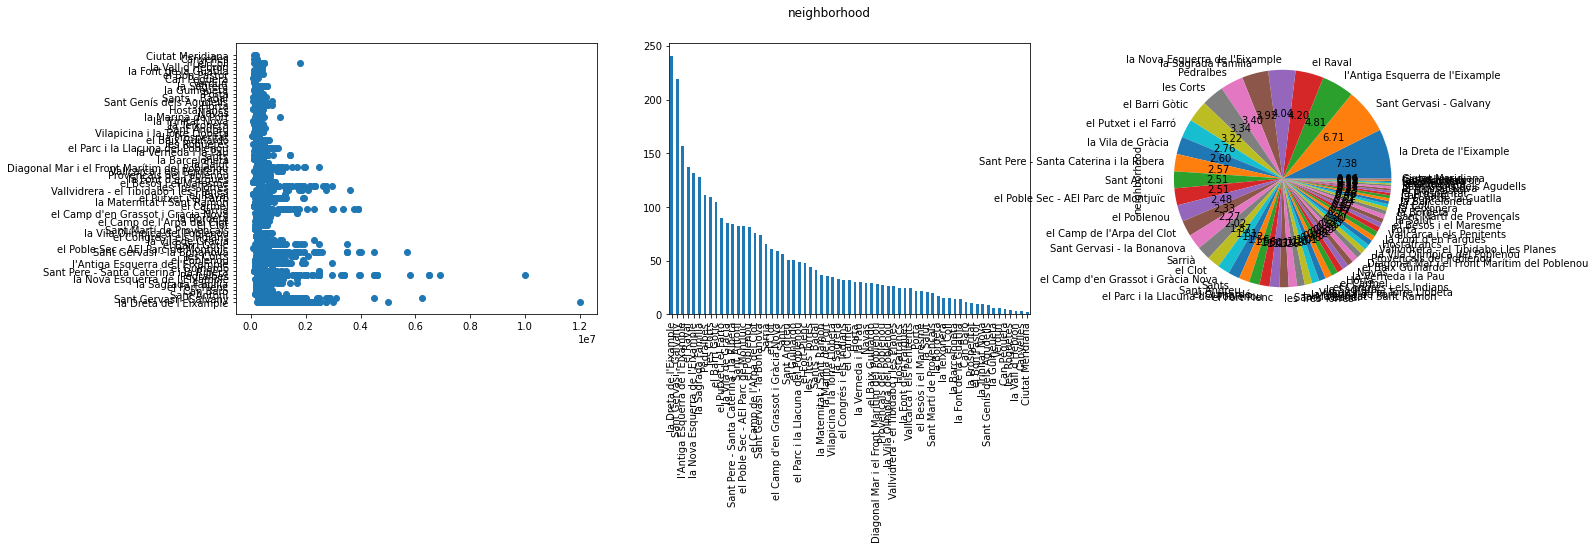

In [16]:
x = 'neighborhood'
func.pintar(df, x)

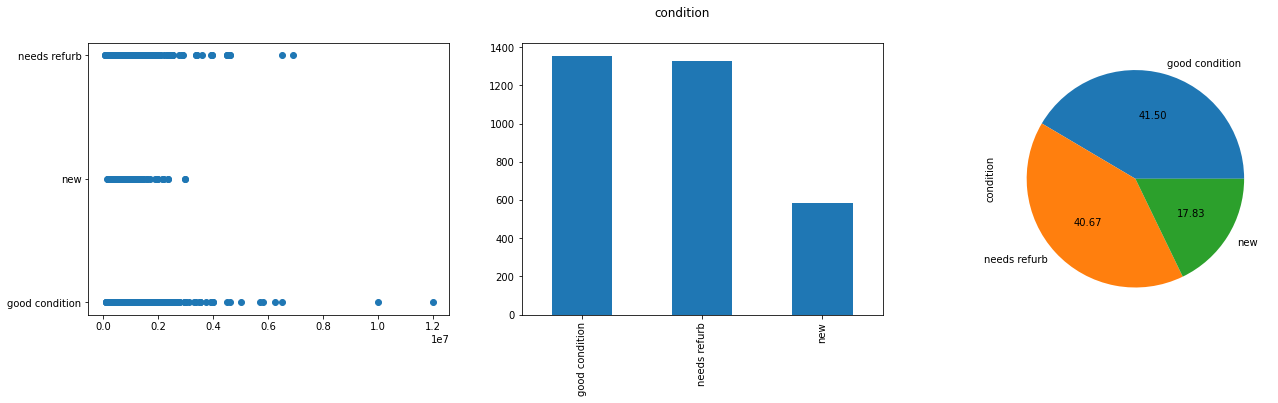

In [17]:
x = 'condition'
func.pintar(df, x)

* Se puede observar como la mayoria de los pisos son pisos en buena condicion y pisos que necesitan reforma, impresiona ver el alto porcentaje de pisos que necesitan reformas. Solo el 17,8% de los pisos en venta en Barcelona son pisos de obra nueva.
 

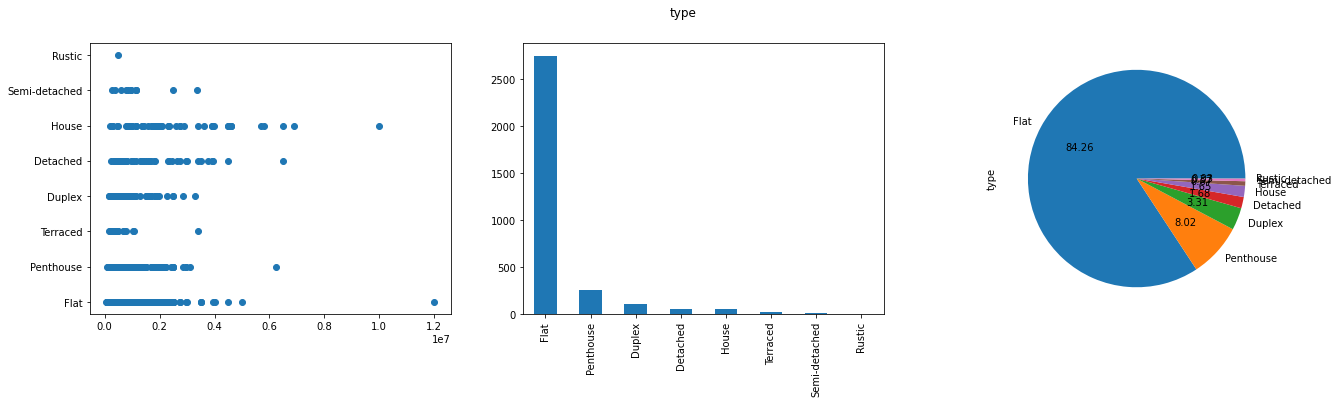

In [18]:
x = 'type'
func.pintar(df, x)

* Se observa claramente como la mayoria de los inmuebles en venta son pisos con el 84,26% seguido lejanamente por la venta de penthouse 8,02% y duplex con 3,31%

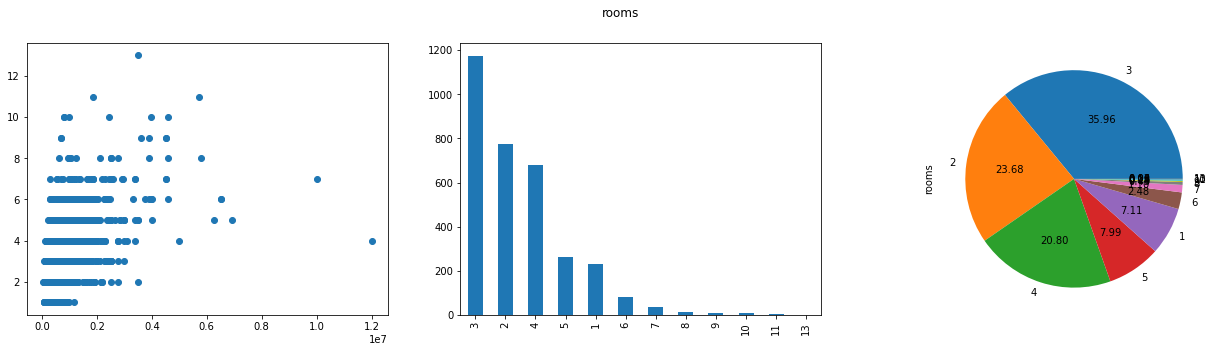

In [19]:
x = 'rooms'
func.pintar(df, x)

* Inmuebles de 3, 2 y 4 habitaciones son mayoria en la venta. Tiene sentido que sean mayoria pues la mayoria de inmuebles en venta son pisos.

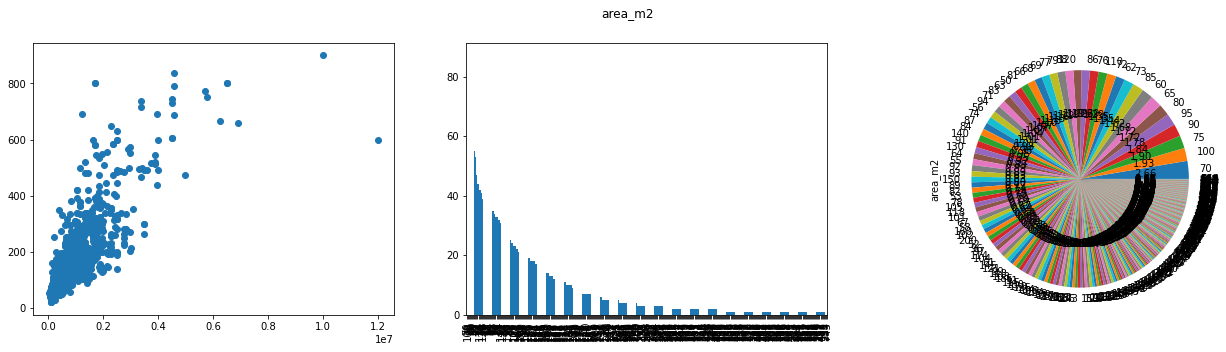

In [20]:
x = 'area_m2'
func.pintar(df, x)

* Como es de esperar la mayoria de inmuebles se encuentran en inmuebles con menos m2 y tambien se puede ver como cuantos mas m2 tenga el inmueble mayor será su precio

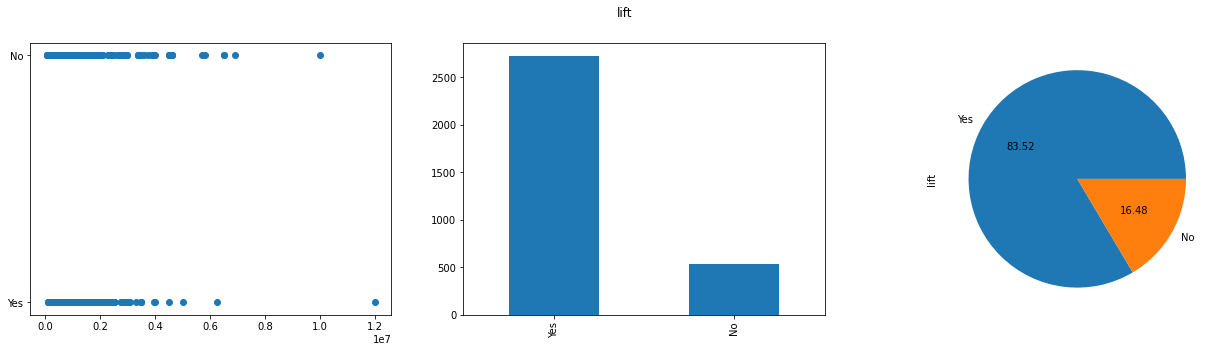

In [21]:
x = 'lift'
func.pintar(df, x)

* El 83.52% de inmuebles tienen ascensor, esperable pues la mayoria de los inmuebles son pisos.

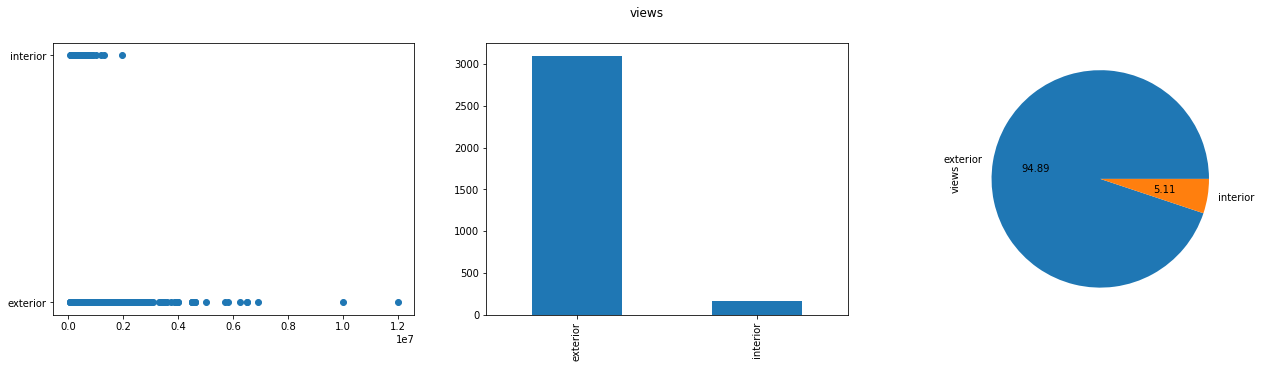

In [22]:
x = 'views'
func.pintar(df, x)

* El 94.89% tiene vistas al exterior, a la calle.

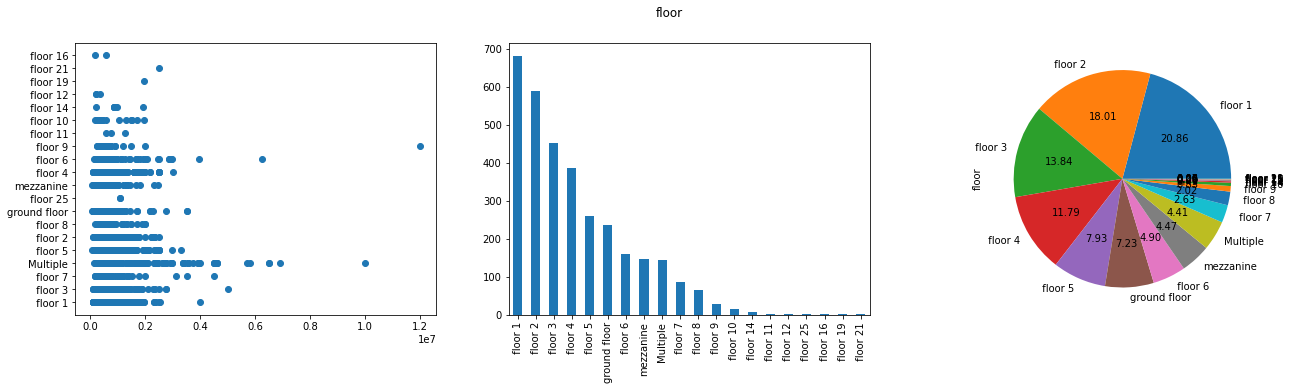

In [23]:
x = 'floor'
func.pintar(df, x)

* El 50% de los inmuebles se encuentran entre la planta 1 y 3 ambas inclusive

# Ahora se analizara la correlación de las variables

In [24]:
estadistico, p_value = shapiro(df.prices)
print('Estadistico=%.3f, p_value=% f' % (estadistico, p_value))

Estadistico=0.564, p_value= 0.000000


* Se utilizará el método Spearman pues el valor de p_valor esta por debajo de 0.05

<AxesSubplot:>

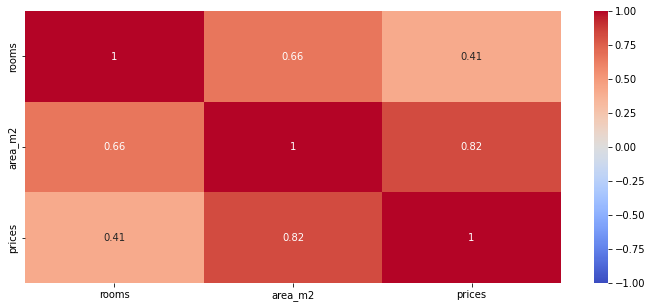

In [25]:
plt.figure(figsize=(12, 5), facecolor='w')
sns.heatmap(df.corr(method='spearman'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

* Como solo se tienen 3 variables numericas no se puede obsevar la correlacion real y completa de los datos.

### Se convierten las variables categoricas a numericas para observa mejor la correlación netre las variables y realizar de forma correcta los modelos de predicción.

In [26]:
func.encoder(df)
df.to_csv('data/processed/df_processed.cvs', index=False)
df

district  neighborhood  condition  type  rooms  area_m2  lift  views  \
0            1            45          0     2      3      351     1      0   
1            9            14          0     2      5      298     1      0   
2            1            12          0     4      2       90     1      0   
3            1            45          0     2      2      130     1      0   
4            3             0          0     7      3      110     0      0   
...        ...           ...        ...   ...    ...      ...   ...    ...   
3260         2            61          1     2      1       64     1      0   
3261         0            17          1     2      3       99     0      0   
3262         4            50          1     2      4      127     1      0   
3263         7            37          1     2      3       64     0      0   
3264         0            41          1     2      4       70     0      0   

      floor   prices  
0         0  2300000  
1        10  1750000  
2        14   590000  
3         0   450000  
4        17   430000  
...     ...      ...  
3260      0   295000  
3261      7   420000  
3262     11   545000  
3263     18   170000  
3264      0   178800  

[3265 rows x 10 columns]

<AxesSubplot:>

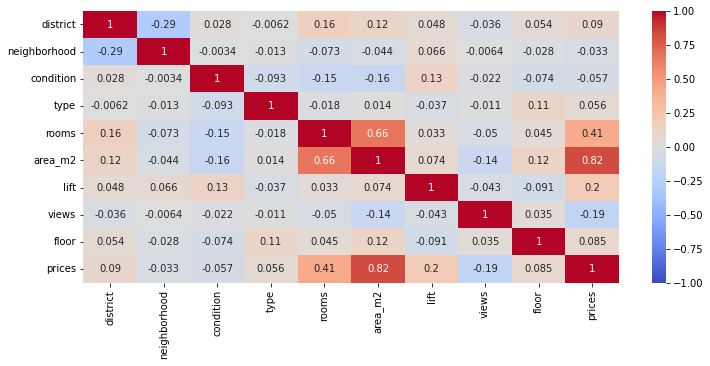

In [27]:
plt.figure(figsize=(12, 5), facecolor='w')
sns.heatmap(df.corr(method='spearman'), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

* Las variables que mas relacion tiene con la variable objetivo son: area_m2, habitaciones, si tienen o no ascensor seguidas del distrino en el que se encuentran y la planta del inmueble.

### Se divide el data set en X e y, la variable objetivo y las variables independientes, siendo 'y' la variable objetivo y 'X' las variables independientes.

### Se utilizarán todas las variables para calcular los modelos.

In [28]:
X = df.drop(['prices'], axis=1)
y = df['prices'].copy()

### Se usa el metodo de entrenamiento train test split donde se usara el  20% de entrenamiento.

In [29]:
X_train, X_test, y_train, y_test = train.tts(X,y)

# ESTANDARIZACION DE LOS DATOS

* Se usa el método MinMaxScaler para el escalado de los mismos

In [30]:
escalar = MinMaxScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

### Se utilizarán los modelos: 
* *'LinearRegresion', 'DecisionTree', 'RandomForest', 'KNeighbors', 'GaussianNB', 'SVR', 'GradientBoosting'* 

Para los que se aplicaran las métricas:
* *Mean Absolute Error ('MAE') y Mean Absolute Error ('RMSE')

##### Se obtienen los valores de las metricas así como los residuos para haya el calculo real de cual es el modelo que mejor predice el precio.

In [31]:
cv_metricas = pd.DataFrame
cv_residuo = pd.DataFrame
dic_residuos = {}
cv_metricas, cv_residuo, dic_residuos = train.modelos(X_train, X_test, y_train, y_test)

In [32]:
cv_metricas.sort_values(by='RMSE')

MAE           RMSE           Modelos
2  134529.826702  331629.292764      RandomForest
0  176645.243346  373404.794973            Linear
3  184890.895355  378207.431514        KNeighbors
1  158432.061256  437272.046910      DecisionTree
4  349476.156202  583539.799197        GaussianNB
6  305953.970450  608809.797670  GradientBoosting
5  348060.020311  760205.355696               SVR

In [33]:
cv_residuo.sort_values(by='RMSE')

Modelos          RMSE
2      RandomForest  8.784798e+07
1      DecisionTree  1.034561e+08
0            Linear  1.153493e+08
3        KNeighbors  1.207338e+08
6  GradientBoosting  1.997879e+08
5               SVR  2.272832e+08
4        GaussianNB  2.282079e+08

### Dibujo de la grafica predicha con la grafica real, donde se puede observar graficamente cual de los modelos se aproxima mas a los datos reales

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


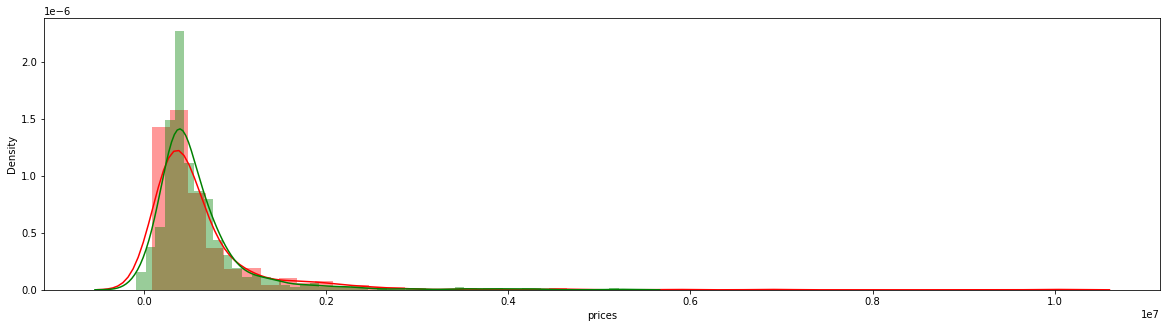

In [34]:
func.pintarPrediccion(dic_residuos, y_test, 'Linear')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


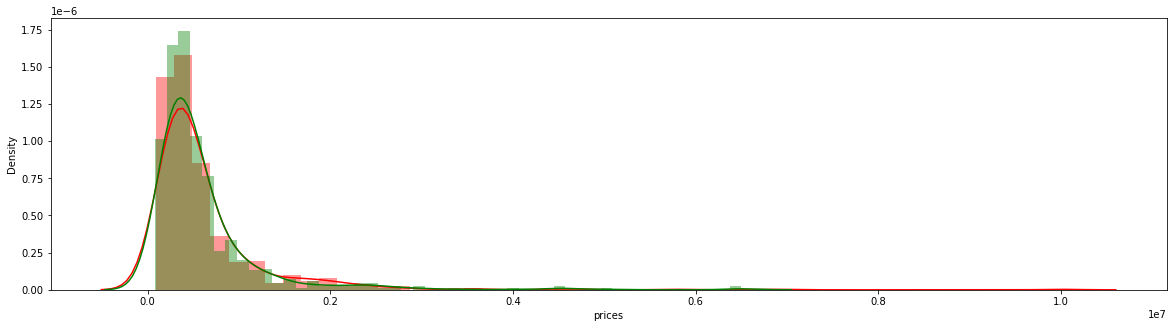

In [35]:
func.pintarPrediccion(dic_residuos, y_test, 'DecisionTree')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


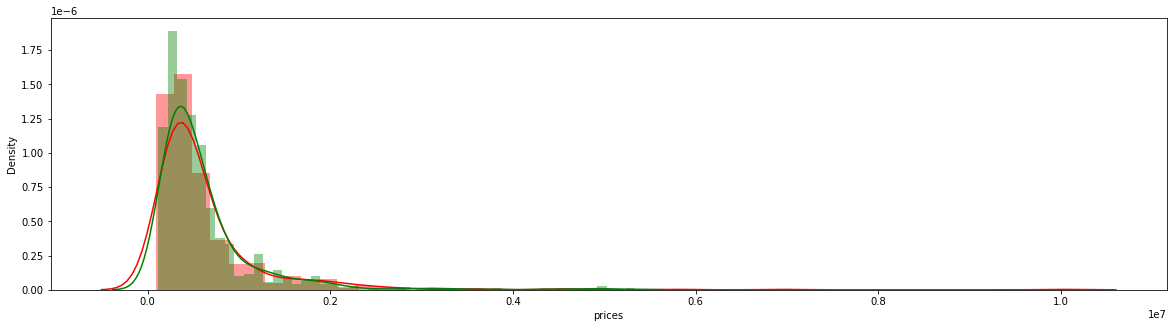

In [36]:
func.pintarPrediccion(dic_residuos, y_test, 'RandomForest')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


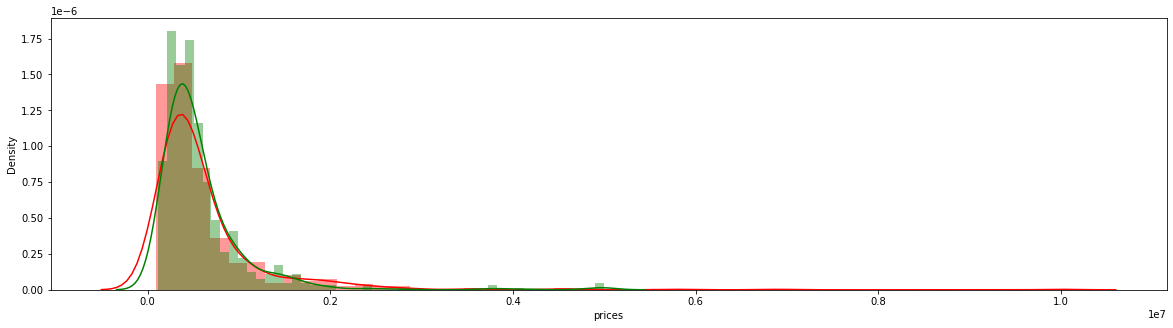

In [37]:
func.pintarPrediccion(dic_residuos, y_test, 'KNeighbors')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


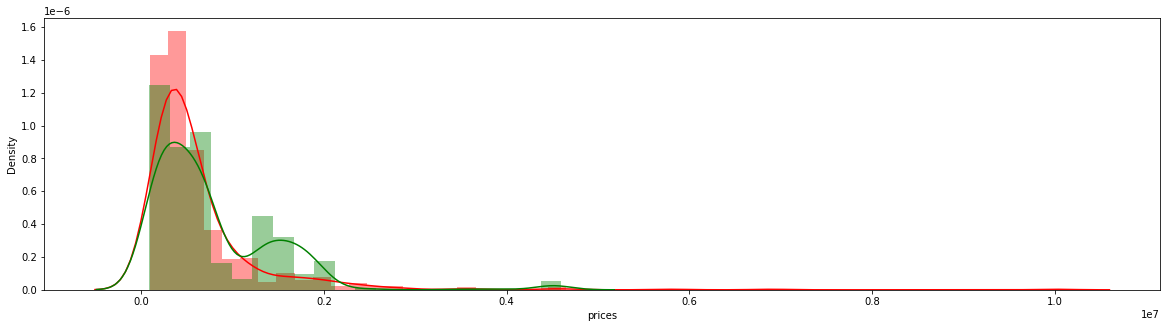

In [38]:
func.pintarPrediccion(dic_residuos, y_test, 'GaussianNB')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


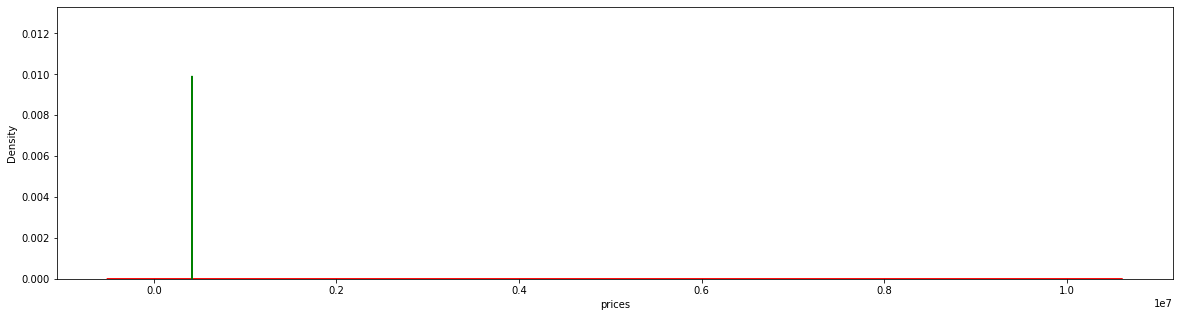

In [39]:
func.pintarPrediccion(dic_residuos, y_test, 'SVR')

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


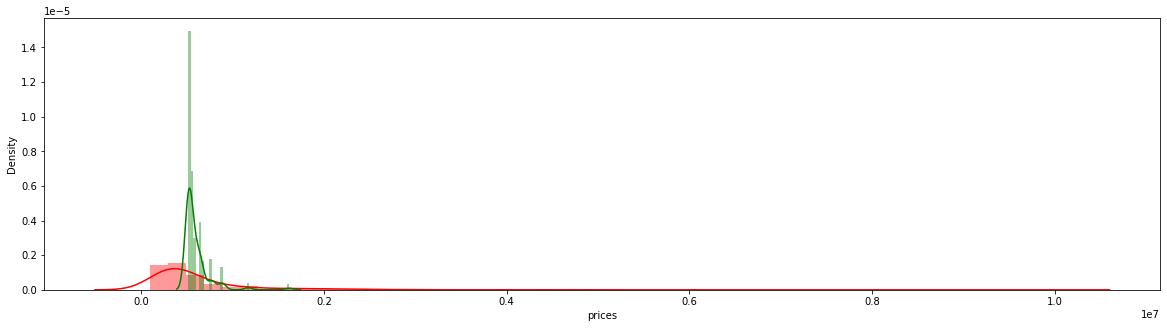

In [40]:
func.pintarPrediccion(dic_residuos, y_test, 'GradientBoosting')

In [41]:
cv_residuo

Modelos          RMSE
0            Linear  1.153493e+08
1      DecisionTree  1.034561e+08
2      RandomForest  8.784798e+07
3        KNeighbors  1.207338e+08
4        GaussianNB  2.282079e+08
5               SVR  2.272832e+08
6  GradientBoosting  1.997879e+08

### Se observa como el mejor modelo es el RandomForest

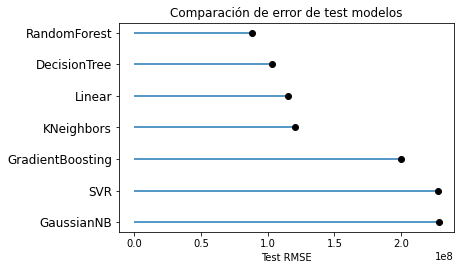

In [42]:
func.pintarResiduos(cv_residuo)

### Ordenadcion de variables por orden de correlación con variable objetivo

In [43]:
variables = df.corr().prices.sort_values().index.tolist()

In [44]:
variables.insert(0,variables.pop())
variables

['prices',
 'neighborhood',
 'condition',
 'views',
 'lift',
 'type',
 'district',
 'floor',
 'rooms',
 'area_m2']

#### Se entrenan los modelos quitando variable a variable por orden de importancia con la variable objetivo y se calcula:
 * Qué modelo es mejor para cada dataframe generado.

In [45]:
resultados = train.model_variables(df,variables)

In [46]:
resultados

{1:         Modelos          RMSE
 0  RandomForest  8.689485e+07,
 2:         Modelos          RMSE
 0  RandomForest  9.194247e+07,
 3:         Modelos          RMSE
 0  RandomForest  9.845606e+07,
 4:         Modelos          RMSE
 0  RandomForest  9.925965e+07,
 5:         Modelos          RMSE
 0  RandomForest  1.029842e+08,
 6:         Modelos          RMSE
 0  RandomForest  1.037509e+08,
 7:         Modelos          RMSE
 0  RandomForest  1.100432e+08,
 8:   Modelos          RMSE
 0  Linear  1.130514e+08,
 9:   Modelos          RMSE
 0     SVR  1.200708e+08}

## El  mejor modelo es el obtenido es Random forest usando con todas las variables

In [47]:
my_model = RandomForestRegressor()
my_model.fit(X_train,y_train)
my_model = my_model.predict(X_test)
print(mean_squared_error(y_test, my_model, squared=False))

329667.82864507404


#### Definición de parametros para el uso de GridSearch, se eligen estos pues son los que mejor resultado han dado tras realizar diferentes pruebas en la asignacion de valores a otros parametros.

In [48]:
parametros={ 'criterion' : ['squared_error', 'absolute_error', 'poisson'],
            'n_estimators': ( 10,20,30,50,70,100),
            'max_samples': (1/3,2/3)}

In [49]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Se utiliza GridSearch para intentar mejorar el resultado obtenido

In [50]:
grid=GridSearchCV(RandomForestRegressor(),
                    param_grid=parametros,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)
grid.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (10, 20, 30, 50, 70, 100)},
             scoring='neg_root_mean_squared_error')

In [51]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error',
                      max_samples=0.6666666666666666, n_estimators=50)

In [52]:
grid.best_score_

-328806.20320420945

In [53]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
21       4.690952      0.248479         0.038001        0.048106   
16       2.263293      0.046792         0.016887        0.001268   
20       2.147313      0.237360         0.010971        0.004966   
23       8.261119      0.524579         0.029322        0.005732   
27       0.434464      0.093886         0.035607        0.044804   

   param_criterion param_max_samples param_n_estimators  \
21  absolute_error          0.666667                 50   
16  absolute_error          0.333333                 70   
20  absolute_error          0.666667                 30   
23  absolute_error          0.666667                100   
27         poisson          0.333333                 50   

                                               params  split0_test_score  \
21  {'criterion': 'absolute_error', 'max_samples':...     -466223.508470   
16  {'criterion': 'absolute_error', 'max_samples':...     -469843.541393   
20  {'criterion': 'absolute_error', 'max_samples':...     -471239.432493   
23  {'criterion': 'absolute_error', 'max_samples':...     -464254.353310   
27  {'criterion': 'poisson', 'max_samples': 0.3333...     -470681.684508   

    split1_test_score  split2_test_score  split3_test_score  \
21     -311335.607317     -294405.532887     -236775.539892   
16     -301493.744451     -311740.898376     -249957.937734   
20     -274514.539659     -304917.243347     -250252.349808   
23     -313035.688138     -309320.380782     -236031.522832   
27     -322159.574728     -296055.605041     -242591.344015   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
21     -335290.827455   -328806.203204    76005.048473                1  
16     -313232.742183   -329253.772827    74009.872123                2  
20     -354667.641467   -331118.241355    78253.800175                3  
23     -335726.147969   -331673.618606    74281.255221                4  
27     -329773.937549   -332252.429168    75657.104932                5

In [54]:
train.comprobar()

funciona por favooooor


### Se puede observar como usando GridSearch el resultado mejora un poco

# Conclusión

Tras el analisis de todos los modelos expuesto y siendo GridSearch con random forest el mejor modelo, se concluye que no es un resultado suficientemente bueno como predecir el precio, es un resultado demasiado amplio para considerar usarlo. Más de 300.000€ de error no es lo suficientemente para ponerlo en producción.

Para mejorarlo se deberian tener mas variables de peso para la realizacion de un modelo mas fuerte.